In [1]:
import math
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

mpl.rcParams['figure.figsize'] = (10, 10)

## Dados

In [2]:
d = 45 / 1000
phi = 89 / 1000

alfa = 0.01
beta = 0.02
c = 0.4

Qv = 5
Vgas= 0.8

dEx = 1400
phiEx = [0.025, 0.032, 0.038]
LEx = 0.6

In [3]:
print('Hole diameter = %d mm' % (d * 1000))
print('Empty hole = %d mm ' % (phi * 1000))
print('Angular deviation = %.2f m/m' % alfa)
print('Collar deviation = %.2f m' % beta)
print('Heat of explosion = %.1f MJ/kg' % Qv)
print('Gas volume at STP = %.2f m3/kg' % Vgas)
print('Density = %d kg/m3' % dEx)
print('Rock constant = %.1f' % c)

Hole diameter = 45 mm
Empty hole = 89 mm 
Angular deviation = 0.01 m/m
Collar deviation = 0.02 m
Heat of explosion = 5.0 MJ/kg
Gas volume at STP = 0.80 m3/kg
Density = 1400 kg/m3
Rock constant = 0.4


## Cálculo sobre os explosivos

In [4]:
Qvo = 5
Vgaso = 0.85
SLFBanfo = 0.84
SLFB = (5*Qv)/(6*Qvo) + Vgas/(6*Vgaso)
Sanfo = SLFB / SLFBanfo
lEx = [(math.pi * (phi/2)**2 * dEx) for phi in phiEx]

In [5]:
print('SFLB = %.2f' % SLFB)
print('Sanfo = %.2f' % Sanfo)
print('Charge concentration')
print('Φ(mm)', *[int(1000*x) for x in phiEx], sep=' ')
print('ℓ(kg/m)', *[round(x, 2) for x in lEx], sep=' ')

SFLB = 0.99
Sanfo = 1.18
Charge concentration
Φ(mm) 25 32 38
ℓ(kg/m) 0.69 1.13 1.59


## Avanço

In [6]:
H = 0.15 + 34.1 * phi - 39.3 * phi ** 2
Ia = 0.95 * H

In [7]:
print('Profundidade do furo = %.1f m' % H)
print('Avanço total = %.1f m' %Ia)

Profundidade do furo = 2.9 m
Avanço total = 2.7 m


## Desvio de perfuração

In [8]:
F = alfa * H + beta
deltaF = F / H * 100

In [9]:
print('Desvio de perfuração: %.2f' % F)
print('Desvio de perfuração percentual: %.2f' % deltaF)

Desvio de perfuração: 0.05
Desvio de perfuração percentual: 1.70


## Pilão - funções de ajuda

In [10]:
def calculo_Bp(A, l):
    return 0.088 * math.sqrt((A * l * Sanfo) / (d * c))

def adequar_B(A):
    B_lista = [calculo_Bp(A, l) for l in lEx]
    r = [abs(2*A - B) for B in B_lista]
    min_index = r.index(min(r))
    return B_lista[min_index]

def adequar_l(x):
    r = [abs(x - l) for l in lEx]
    min_index = r.index(min(r))
    return lEx[min_index], phiEx[min_index]

def arredondar_cartucho(x):
    return int(5 * round(x/.5)) / 10

## Pilão - Cartuchos

In [11]:
T = 10 * d
nCEx = arredondar_cartucho((H - T) / LEx)

## Pilão - Primeiro Quadrilátero

In [12]:
B1 = 1.7 * phi
B1p = 1.5 * phi if deltaF < 1 else 1.7 * phi - F
A1 = math.sqrt(2) * B1p
l1, t1 = adequar_l(55 * d * (B1/phi)**1.5 * (B1-phi/2) * (c/0.4) * (1/Sanfo))

In [13]:
print('Maximum burden B = %.2f m' % B1)
print('Practical burden B1 = %.2f m' % B1p)
print('Charge concentration = %.2f kg/m' % l1)
print('Unloaded hole length = %.2f m' % T)
print('Hole distance in quadrangle A\' = %.2f m' % A1)
print('No. of %d x %d cartriges = %.1f' % (t1*1000, LEx*1000, nCEx))

Maximum burden B = 0.15 m
Practical burden B1 = 0.10 m
Charge concentration = 0.69 kg/m
Unloaded hole length = 0.45 m
Hole distance in quadrangle A' = 0.15 m
No. of 25 x 600 cartriges = 4.0


## Pilão - Segundo Quadrilátero

In [14]:
A1_ = math.sqrt(2) * (B1p - F)
B2 = adequar_B(A1_)
B2p = B2 - F
A2 = math.sqrt(2) * (B2p + A1/2)
l2, t2 = adequar_l(55 * d * (B2/phi)**1.5 * (B2-phi/2) * (c/0.4) * (1/Sanfo))

In [15]:
print('A = %.2f m' % A1_)
print('Maximum burden B = %.2f m' % B2)
print('Practical burden B2 = %.2f m' % B2p)
print('Charge concentration = %.2f kg/m' % l2)
print('Unloaded hole length = %.2f m' % T)
print('Hole distance in quadrangle A\' = %.2f m' % A2)
print('No. of %d x %d cartriges = %.1f' % (t2*1000, LEx*1000, nCEx))

A = 0.08 m
Maximum burden B = 0.16 m
Practical burden B2 = 0.11 m
Charge concentration = 0.69 kg/m
Unloaded hole length = 0.45 m
Hole distance in quadrangle A' = 0.26 m
No. of 25 x 600 cartriges = 4.0


## Pilão - Terceiro Quadrilátero

In [16]:
A2_ = math.sqrt(2) * (B2p + A1/2 - F)
B3 = adequar_B(A2_)
B3p = B3 - F
A3 = math.sqrt(2) * (B3p + A2/2)
l3, t3 = adequar_l(55 * d * (B3/phi)**1.5 * (B3-phi/2) * (c/0.4) * (1/Sanfo))

In [17]:
print('A = %.2f m' % A2_)
print('Maximum burden B = %.2f m' % B3)
print('Practical burden B3 = %.2f m' % B3p)
print('Charge concentration = %.2f kg/m' % l3)
print('Unloaded hole length = %.2f m' % T)
print('Hole distance in quadrangle A\' = %.2f m' % A3)
print('No. of %d x %d cartriges = %.1f' % (t3*1000, LEx*1000, nCEx))

A = 0.20 m
Maximum burden B = 0.40 m
Practical burden B3 = 0.35 m
Charge concentration = 1.59 kg/m
Unloaded hole length = 0.45 m
Hole distance in quadrangle A' = 0.68 m
No. of 38 x 600 cartriges = 4.0


## Pilão - Quarto Quadrilátero

In [18]:
A3_ = math.sqrt(2) * (B3p + A2/2 - F)
B4 = adequar_B(A3_)
B4p = B4 - F
A4 = math.sqrt(2) * (B4p + A3/2)
l4, t4 = adequar_l(55 * d * (B4/phi)**1.5 * (B4-phi/2) * (c/0.4) * (1/Sanfo))

In [19]:
print('A = %.2f' % A3_)
print('Maximum burden B = %.2f' % B4)
print('Practical burden B4 = %.2f' % B4p)
print('Charge concentration = %.2f kg/m' % l4)
print('Unloaded hole length = %.2f m' % T)
print('Hole distance in quadrangle A\' = %.2f' % A4)
print('No. of %d x %d cartriges = %.1f' % (t4*1000, LEx*1000, nCEx))

A = 0.61
Maximum burden B = 0.70
Practical burden B4 = 0.65
Charge concentration = 1.59 kg/m
Unloaded hole length = 0.45 m
Hole distance in quadrangle A' = 1.40
No. of 38 x 600 cartriges = 4.0


## Desenho do Pilão

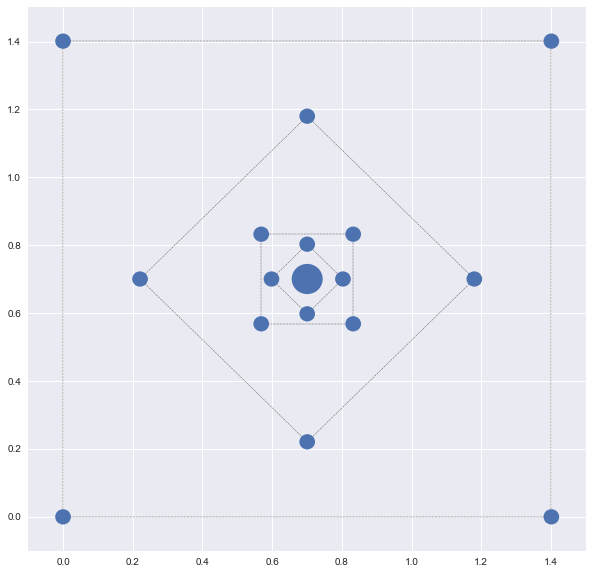

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlim(-0.1, A4+0.1)
plt.ylim(-0.1, A4+0.1)

# Furo vazio
xc, yc = (A4/2, A4/2)
ax.add_patch(patches.Circle((xc, yc), phi/2))

# Primeiro Pilão
coords1 = [(xc-B1p, yc), (xc, yc-B1p),(xc+B1p, yc), (xc, yc+B1p)]
ax.add_patch(patches.Polygon(coords1, fill=False, ls='-.'))
for coord1 in coords1:
    ax.add_patch(patches.Circle(coord1, d/2))

# Segundo Pilão
coords2 = [(xc-A2/2, yc-A2/2), (xc+A2/2, yc-A2/2), (xc+A2/2, yc+A2/2), (xc-A2/2, yc+A2/2)]
ax.add_patch(patches.Polygon(coords2, fill=False, ls='-.'))
for coord2 in coords2:
    ax.add_patch(patches.Circle(coord2, d/2))

# Terceiro Pilão
coords3 = [(xc-(B3p+A2/2), yc), (xc, yc-(B3p+A2/2)),(xc+(B3p+A2/2), yc), (xc, yc+(B3p+A2/2))]
ax.add_patch(patches.Polygon(coords3, fill=False, ls='-.'))
for coord3 in coords3:
    ax.add_patch(patches.Circle(coord3, d/2))

# Quarto Pilão
coords4 = [(xc-A4/2, yc-A4/2), (xc+A4/2, yc-A4/2), (xc+A4/2, yc+A4/2), (xc-A4/2, yc+A4/2)]
ax.add_patch(patches.Polygon(coords4, fill=False, ls='-.'))
for coord4 in coords4:
    ax.add_patch(patches.Circle(coord4, d/2))

plt.savefig('pilao.png')
plt.show()